In [1]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
import tensorflow.keras.backend as be

In [2]:
from utils import *
from data import *
from layers import *
from models import *

In [3]:
from models import *

In [4]:
limit_gpus()
set_gpu(0)

In [5]:
dpi=100

In [6]:
dataset = "fashion_mnist"
ds_train, ds_test, ds_info = load_dataset(dataset, 128)

input_shape = ds_info.features['image'].shape
num_classes = ds_info.features['label'].num_classes

In [7]:
x_train, y_train = get_raw_dat(ds_train)

In [8]:
_, y_test = get_raw_dat(ds_test)

In [9]:
xs, ys = next(iter(ds_train))

In [10]:
input_shape

(28, 28, 1)

In [11]:
model = PhasorModel(input_shape, 
                    onehot_offset=0.0, 
                    onehot_phase=0.5,
                    projection="dot",
                   
                   exec_time=5.0,
                   repeats=5,
                   max_step=0.02)

In [12]:
ys0 = model(xs)

(array([167., 169., 127., 153., 150., 145.,  84.,  79.,  85., 121.]),
 array([-9.9793172e-01, -7.9836708e-01, -5.9880245e-01, -3.9923784e-01,
        -1.9967322e-01, -1.0859966e-04,  1.9945602e-01,  3.9902064e-01,
         5.9858525e-01,  7.9814988e-01,  9.9771452e-01], dtype=float32),
 <BarContainer object of 10 artists>)

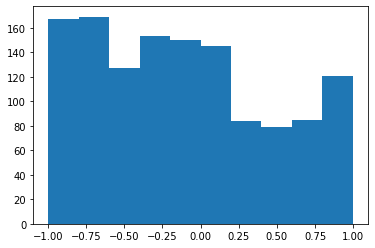

In [13]:
plt.hist(ys0.numpy().ravel())

In [14]:
model.compile(optimizer="rmsprop")

In [15]:
loss = model.train(ds_train, 2)

Training loss tf.Tensor(1.0009819, shape=(), dtype=float32)
Training loss tf.Tensor(0.041473024, shape=(), dtype=float32)
Training loss tf.Tensor(0.035552993, shape=(), dtype=float32)
Training loss tf.Tensor(0.03966169, shape=(), dtype=float32)
Training loss tf.Tensor(0.032696012, shape=(), dtype=float32)
Training loss tf.Tensor(0.027727824, shape=(), dtype=float32)
Training loss tf.Tensor(0.027176483, shape=(), dtype=float32)
Training loss tf.Tensor(0.024090394, shape=(), dtype=float32)
Training loss tf.Tensor(0.03812684, shape=(), dtype=float32)
Training loss tf.Tensor(0.02708406, shape=(), dtype=float32)


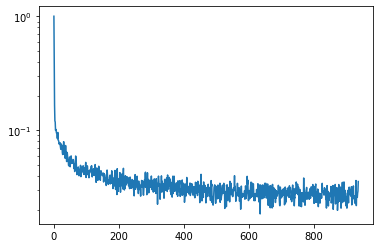

In [16]:
plt.semilogy(loss)

In [17]:
yh1 = model(xs)

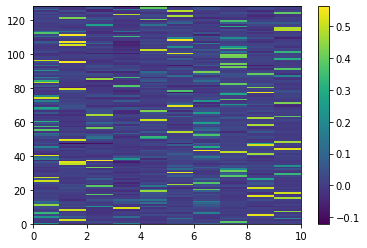

In [18]:
plt.pcolor(yh1)
plt.colorbar()

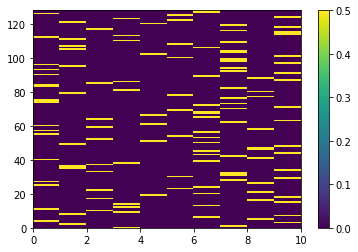

In [19]:
plt.pcolor(model.to_phase(ys))
plt.colorbar()

In [20]:
conf = model.accuracy(ds_test)

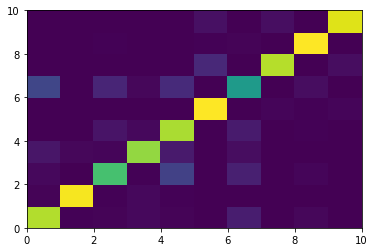

In [21]:
plt.pcolor(conf[0])

In [22]:
confusion_to_accuracy(conf)

<tf.Tensor: shape=(), dtype=float64, numpy=0.8404>

In [23]:
small_test = tf.data.Dataset.from_tensor_slices((xs[0:10,...], ys[0:10,...]))
small_test = small_test.batch(10)

In [27]:
xi0 = model.phase_to_train(model.flatten(next(iter(small_test))[0]))

In [28]:
xi0[0]

(array([  0,   1,   2, ..., 781, 782, 783]),
 array([0.5, 0.5, 0.5, ..., 4.5, 4.5, 4.5], dtype=float32))

In [29]:
od1 = model.dense1.call_dynamic(xi0)

100%|██████████| 10/10 [00:11<00:00,  1.18s/it]


[(array([ 0,  0,  0,  0,  0,  1,  1,  1,  1,  2,  2,  2,  2,  2,  3,  3,  3,
          3,  4,  4,  4,  4,  4,  5,  5,  5,  5,  6,  6,  6,  6,  7,  7,  7,
          7,  8,  8,  8,  8,  9,  9,  9,  9, 10, 10, 10, 10, 10, 11, 11, 11,
         11, 11, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 14, 14, 14, 14, 15,
         15, 15, 15, 15, 16, 16, 16, 16, 17, 17, 17, 17, 18, 18, 18, 18, 18,
         19, 19, 19, 19, 20, 20, 20, 20, 21, 21, 21, 21, 21, 22, 22, 22, 22,
         23, 23, 23, 23, 23, 24, 24, 24, 24, 25, 25, 25, 25, 25, 26, 26, 26,
         26, 26, 27, 27, 27, 27, 28, 28, 28, 28, 28, 29, 29, 29, 29, 30, 30,
         30, 30, 30, 31, 31, 31, 31, 32, 32, 32, 32, 33, 33, 33, 33, 33, 34,
         34, 34, 34, 34, 35, 35, 35, 35, 36, 36, 36, 36, 36, 37, 37, 37, 37,
         38, 38, 38, 38, 39, 39, 39, 39, 40, 40, 40, 40, 41, 41, 41, 41, 41,
         42, 42, 42, 42, 42, 43, 43, 43, 43, 44, 44, 44, 44, 45, 45, 45, 45,
         45, 46, 46, 46, 46, 47, 47, 47, 47, 48, 48, 48, 48, 48, 49, 49, 49,

In [30]:
od1 = Out[29]

In [35]:
od1[0][1].dtype

dtype('float64')

In [36]:
od2 = model.dense2.call_dynamic(od1)

100%|██████████| 10/10 [00:09<00:00,  1.04it/s]


In [24]:
small_yhs = model.evaluate(small_test, method="dynamic")

100%|██████████| 10/10 [00:18<00:00,  1.88s/it]


In [25]:
small_a1 = model.predict(small_yhs, method="dynamic_mode")

In [26]:
small_a2 = model.predict(small_yhs, method="dynamic_mean")

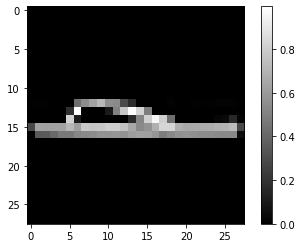

In [27]:
plt.imshow(xs[0,...], cmap="gray")
plt.colorbar()

In [28]:
preprocess = keras.Sequential([model.layers[0]])

In [29]:
input_spikes = model.phase_to_train(tf.multiply(preprocess(xs[0:10,...]), model.direction))

Text(0.5, 1.0, 'Input Layer')

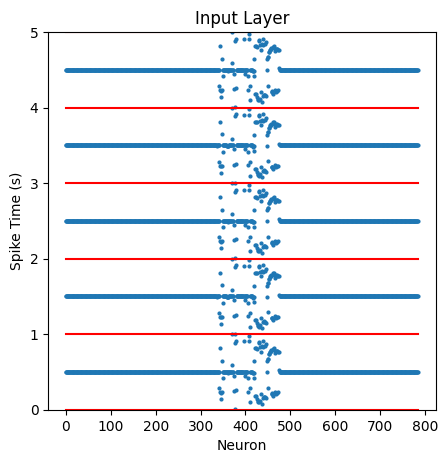

In [30]:
plt.figure(dpi=dpi, figsize=(5,5))
for i in range(10):
    plt.plot([0,784],[0.0+i,0+i], color="red")
plt.scatter(input_spikes[0][0], input_spikes[0][1], label="Input Spikes (Drive)", s=4)
#plt.scatter(dynamic_spikes[0][0], dynamic_spikes[0][1], label="Output Spikes (Response)")
#plt.xticks(lblinds, np.around(phases.ravel()[lblinds], decimals=2));

plt.xlabel("Neuron")
plt.ylabel("Spike Time (s)")
plt.ylim(0,5)
#plt.ylim(-0.5,10)
plt.title("Input Layer")

In [31]:
spk_layer1 = model.dense1.spike_trains

Text(0.5, 1.0, 'Dense 1')

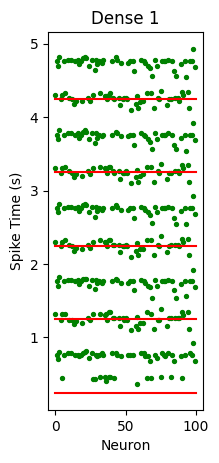

In [32]:
plt.figure(dpi=dpi, figsize=(2,5))
#plt.scatter(dynamic_input[0][0], dynamic_input[0][1], label="Input Spikes (Drive)")
for i in range(5):
    plt.plot([0,100],[0.25+i,0.25+i], color="red")
plt.scatter(spk_layer1[0][0], spk_layer1[0][1], label="Output Spikes (Response)", color="green", s=8)
#plt.xticks(lblinds, np.around(phases.ravel()[lblinds], decimals=2));
plt.xlabel("Neuron")
plt.ylabel("Spike Time (s)")
#plt.ylim(-0.5,10)
plt.title("Dense 1")

In [33]:
spk_layer2 = model.dense2.spike_trains

Text(0.5, 1.0, 'Dense 2')

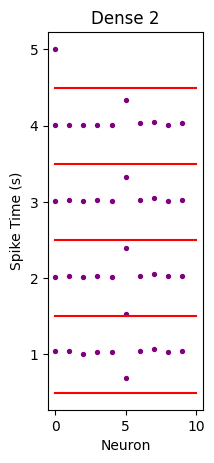

In [34]:
plt.figure(dpi=dpi, figsize=(2,5))
#plt.scatter(dynamic_input[0][0], dynamic_input[0][1], label="Input Spikes (Drive)")
for i in range(5):
    plt.plot([0,10],[0.50+i,0.50+i], color="red")
plt.scatter(spk_layer2[0][0], spk_layer2[0][1], label="Output Spikes (Response)", color="purple", s=8)
#plt.xticks(lblinds, np.around(phases.ravel()[lblinds], decimals=2));
plt.xlabel("Neuron")
plt.ylabel("Spike Time (s)")
#plt.ylim(-0.5,10)
plt.title("Dense 2")

In [35]:
small_a1

array([5, 0, 6, 2, 3, 8, 7, 1, 5, 7])

In [36]:
np.mean(small_a1 == ys[0:10])

1.0

In [38]:
np.mean(small_a2.ravel() == ys[0:10])

1.0

In [43]:
#full dynamic execution on test set - takes a few hours

In [22]:
all_yhs = model.evaluate(ds_test, method="dynamic")

100%|██████████| 16/16 [00:15<00:00,  1.01it/s]


In [31]:
np.savez_compressed("fashion_yhs_dynamic.npz", yhs=all_yhs.numpy(), ys=y_test)

In [25]:
yhmode = model.predict(all_yhs, "mode").ravel()

In [26]:
yhmean = model.predict(all_yhs, "dynamic_mean")

In [29]:
np.mean(yhmode == y_test)

0.8357

In [30]:
np.mean(yhmean == y_test)

0.8357

In [79]:
zs = model.dense1.solutions[0].y

In [83]:
zs = model.dense1.solutions[1].y

In [84]:
zs.shape

(100, 157)

In [32]:
model.evaluate(ds_test)

<tf.Tensor: shape=(10000, 10), dtype=float32, numpy=
array([[ 1.6586265e-02,  5.2529991e-01,  6.3262950e-03, ...,
         4.7232946e-03, -6.0856016e-03,  1.3597242e-03],
       [ 1.3924162e-01, -1.7226320e-02,  7.1256855e-03, ...,
        -2.0492092e-02, -3.4299508e-02, -1.8003222e-02],
       [-1.2260120e-02, -2.1087781e-03, -4.4639733e-02, ...,
        -5.5969278e-03, -2.0423129e-03,  2.0672766e-02],
       ...,
       [ 8.9065760e-02,  1.6875458e-01, -6.9767316e-03, ...,
        -4.4546209e-02, -8.3237775e-03,  2.5417980e-02],
       [ 3.7940429e-03,  8.3140070e-03,  3.2022633e-02, ...,
        -6.8708975e-03, -1.1248193e-03, -1.0997778e-02],
       [-2.0389389e-03,  5.1500750e-01,  1.2244536e-02, ...,
        -8.3018569e-03, -3.1137554e-04, -8.2392682e-04]], dtype=float32)>

In [35]:
def train_and_save(num):
    model = PhasorModel(input_shape, 
                    onehot_offset=0.0, 
                    onehot_phase=0.5,
                    projection="dot",
                   
                   exec_time=5.0,
                   repeats=5,
                   max_step=0.02)
    model.compile(optimizer="rmsprop")
    loss = model.train(ds_train, 2)
    
    yh_static = model.evaluate(ds_test, method="static")
    yh_dynamic = model.evaluate(ds_test, method="dynamic")
    
    name = "fashion_model_"+str(num)+".npz"
    np.savez_compressed(name, 
                        yh_static=yh_static.numpy(),
                        yh_dynamic=yh_dynamic.numpy(),
                        ys=y_test.numpy())

In [36]:
train_and_save(5)

Training loss tf.Tensor(1.0986388, shape=(), dtype=float32)
Training loss tf.Tensor(0.044564262, shape=(), dtype=float32)
Training loss tf.Tensor(0.031964462, shape=(), dtype=float32)
Training loss tf.Tensor(0.038063597, shape=(), dtype=float32)
Training loss tf.Tensor(0.02844527, shape=(), dtype=float32)
Training loss tf.Tensor(0.02875573, shape=(), dtype=float32)
Training loss tf.Tensor(0.02644289, shape=(), dtype=float32)
Training loss tf.Tensor(0.024948452, shape=(), dtype=float32)
Training loss tf.Tensor(0.025934553, shape=(), dtype=float32)
Training loss tf.Tensor(0.028096206, shape=(), dtype=float32)


100%|██████████| 16/16 [00:16<00:00,  1.06s/it]


In [ ]:
for i in range(4):
    train_and_save(i)

Training loss tf.Tensor(1.0027497, shape=(), dtype=float32)
Training loss tf.Tensor(0.051746763, shape=(), dtype=float32)
Training loss tf.Tensor(0.037566252, shape=(), dtype=float32)
Training loss tf.Tensor(0.035078987, shape=(), dtype=float32)
Training loss tf.Tensor(0.028181175, shape=(), dtype=float32)
Training loss tf.Tensor(0.03525988, shape=(), dtype=float32)
Training loss tf.Tensor(0.02566436, shape=(), dtype=float32)
Training loss tf.Tensor(0.029525861, shape=(), dtype=float32)
Training loss tf.Tensor(0.030077353, shape=(), dtype=float32)
Training loss tf.Tensor(0.03021628, shape=(), dtype=float32)


100%|██████████| 16/16 [00:14<00:00,  1.07it/s]


Training loss tf.Tensor(1.0336604, shape=(), dtype=float32)
Training loss tf.Tensor(0.044945233, shape=(), dtype=float32)
Training loss tf.Tensor(0.032664888, shape=(), dtype=float32)
Training loss tf.Tensor(0.03168826, shape=(), dtype=float32)
Training loss tf.Tensor(0.025435891, shape=(), dtype=float32)
Training loss tf.Tensor(0.03351069, shape=(), dtype=float32)
Training loss tf.Tensor(0.03588455, shape=(), dtype=float32)
Training loss tf.Tensor(0.033536542, shape=(), dtype=float32)
Training loss tf.Tensor(0.025978046, shape=(), dtype=float32)
Training loss tf.Tensor(0.024033714, shape=(), dtype=float32)


100%|██████████| 16/16 [00:16<00:00,  1.03s/it]


Training loss tf.Tensor(0.78262395, shape=(), dtype=float32)
Training loss tf.Tensor(0.044942103, shape=(), dtype=float32)
Training loss tf.Tensor(0.02809744, shape=(), dtype=float32)
Training loss tf.Tensor(0.033645917, shape=(), dtype=float32)
Training loss tf.Tensor(0.030499382, shape=(), dtype=float32)
Training loss tf.Tensor(0.029568221, shape=(), dtype=float32)
Training loss tf.Tensor(0.02722311, shape=(), dtype=float32)
Training loss tf.Tensor(0.03133602, shape=(), dtype=float32)
Training loss tf.Tensor(0.029840875, shape=(), dtype=float32)
Training loss tf.Tensor(0.025258638, shape=(), dtype=float32)


100%|██████████| 16/16 [00:15<00:00,  1.05it/s]


Training loss tf.Tensor(1.0344, shape=(), dtype=float32)
Training loss tf.Tensor(0.051153235, shape=(), dtype=float32)
Training loss tf.Tensor(0.041402683, shape=(), dtype=float32)
Training loss tf.Tensor(0.027831022, shape=(), dtype=float32)
Training loss tf.Tensor(0.03051995, shape=(), dtype=float32)
Training loss tf.Tensor(0.03403031, shape=(), dtype=float32)
Training loss tf.Tensor(0.026748395, shape=(), dtype=float32)
Training loss tf.Tensor(0.028508496, shape=(), dtype=float32)
Training loss tf.Tensor(0.02330657, shape=(), dtype=float32)
Training loss tf.Tensor(0.026930723, shape=(), dtype=float32)


 91%|█████████ | 116/128 [02:14<00:13,  1.13s/it]

In [38]:
train_and_save(4)

Training loss tf.Tensor(1.0517688, shape=(), dtype=float32)
Training loss tf.Tensor(0.044850238, shape=(), dtype=float32)
Training loss tf.Tensor(0.034086775, shape=(), dtype=float32)
Training loss tf.Tensor(0.029586164, shape=(), dtype=float32)
Training loss tf.Tensor(0.025021702, shape=(), dtype=float32)
Training loss tf.Tensor(0.027869398, shape=(), dtype=float32)
Training loss tf.Tensor(0.024150774, shape=(), dtype=float32)
Training loss tf.Tensor(0.029402269, shape=(), dtype=float32)
Training loss tf.Tensor(0.021470817, shape=(), dtype=float32)
Training loss tf.Tensor(0.027773581, shape=(), dtype=float32)


 62%|██████▏   | 79/128 [01:13<00:46,  1.06it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|██████████| 16/16 [00:14<00:00,  1.07it/s]


In [ ]:
for i in range(6,8):
    train_and_save(i)

Training loss tf.Tensor(1.3147192, shape=(), dtype=float32)
Training loss tf.Tensor(0.0407224, shape=(), dtype=float32)
Training loss tf.Tensor(0.041829146, shape=(), dtype=float32)
Training loss tf.Tensor(0.029720541, shape=(), dtype=float32)
Training loss tf.Tensor(0.033869945, shape=(), dtype=float32)
Training loss tf.Tensor(0.0381246, shape=(), dtype=float32)
Training loss tf.Tensor(0.030133992, shape=(), dtype=float32)
Training loss tf.Tensor(0.028000625, shape=(), dtype=float32)
Training loss tf.Tensor(0.025886213, shape=(), dtype=float32)
Training loss tf.Tensor(0.024266403, shape=(), dtype=float32)


 11%|█         | 14/128 [00:15<02:06,  1.11s/it]